Description: In this notebook file, you can find the code regarding how to make a normal model into color invariant or color insensitive model. In this file, you have to input a sequential model and it outputs same sequential model but will additional layers added at the begining of the model due to which the color invariance can be achieved.

Note: We have tested this approach on VGG style architecture and we are confident that the improvement in the results can be achieved under 5 seconds (as we only need to transfer weights). But, in the resnet style architecture, due to residual function nature we are not able to analyze the direct impact on this approach.

In [1]:
# Importing the required libraries
from tensorflow.keras.models import load_model
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Add
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
# Loading the VGG style model which is already trained on the training dataset
model = load_model(input_path)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 298, 298, 32)      0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 298, 298, 32)     128       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      1

In [4]:
# Here, we are getting the weights of the first layer. This is because, in the first layer only, we have associations with 
# color channels
weights_of_first_layer = model.layers[0].get_weights()

In [5]:
# Separating the kernels and bias of the first layer
kernels = weights_of_first_layer[0]
bias = weights_of_first_layer[1]

In [6]:
print(f"The shape of the kernels {kernels.shape}")
print(f"The shape of the bias {bias.shape}")

The shape of the kernels (3, 3, 3, 32)
The shape of the bias (32,)


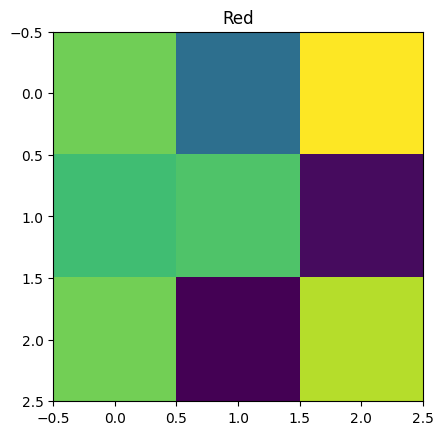

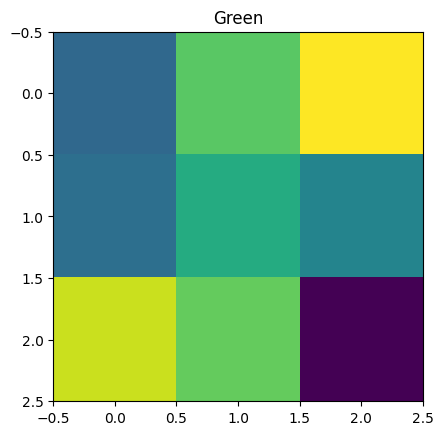

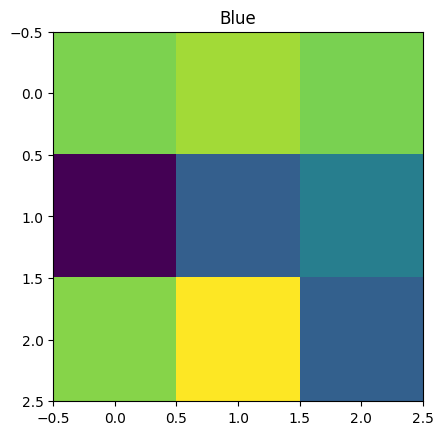

<Figure size 640x480 with 0 Axes>

In [7]:
# Displaying the first set of kernels which are associated for each color channel
colors = ["Red", "Green", "Blue"]
for i in range(3):
    plt.title(colors[i])
    plt.imshow(kernels[:,:, i, 0])
    plt.figure()

In [8]:
# Creating dummy arrays in the same shape as the kernels before and initializing everything wit zero
new_kernel1 = np.zeros(kernels.shape)
new_kernel2 = np.zeros(kernels.shape)
new_kernel3 = np.zeros(kernels.shape)
new_kernel4 = np.zeros(kernels.shape)
new_kernel5 = np.zeros(kernels.shape)

In [9]:
# Now, to achive color invariance, we need to arrage kernels in all combinations of RGB. So, each combination is associated 
# with each new layer which are going to create.
# Combinations include: RBG, GRB, GBR, BRG, BGR

In [10]:
# Initializing the new kernel weights with appropriate color ordering

# RBG
new_kernel1[:, :, 0, :] = kernels[:, :, 0, :]
new_kernel1[:, :, 1, :] = kernels[:, :, 2, :]
new_kernel1[:, :, 2, :] = kernels[:, :, 1, :]

# GRB
new_kernel2[:, :, 0, :] = kernels[:, :, 1, :]
new_kernel2[:, :, 1, :] = kernels[:, :, 0, :]
new_kernel2[:, :, 2, :] = kernels[:, :, 2, :]

# GBR
new_kernel3[:, :, 0, :] = kernels[:, :, 1, :]
new_kernel3[:, :, 1, :] = kernels[:, :, 2, :]
new_kernel3[:, :, 2, :] = kernels[:, :, 0, :]

# BRG
new_kernel4[:, :, 0, :] = kernels[:, :, 2, :]
new_kernel4[:, :, 1, :] = kernels[:, :, 0, :]
new_kernel4[:, :, 2, :] = kernels[:, :, 1, :]

# BGR
new_kernel5[:, :, 0, :] = kernels[:, :, 2, :]
new_kernel5[:, :, 1, :] = kernels[:, :, 1, :]
new_kernel5[:, :, 2, :] = kernels[:, :, 0, :]

In [11]:
# Grouping the weights and biases of each layer so that new layers can be initialized with them

weights1 = [new_kernel1, bias]
weights2 = [new_kernel2, bias]
weights3 = [new_kernel3, bias]
weights4 = [new_kernel4, bias]
weights5 = [new_kernel5, bias]

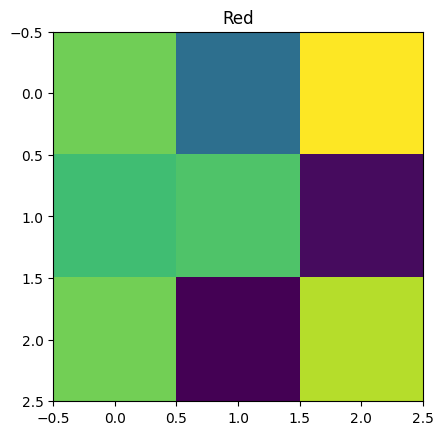

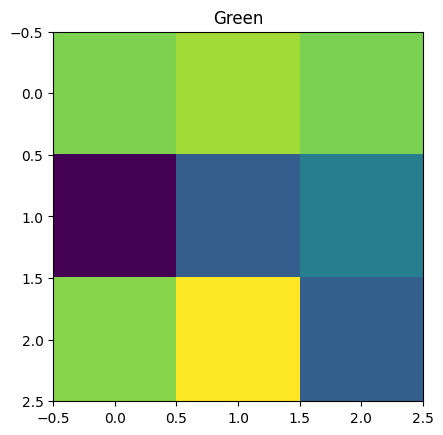

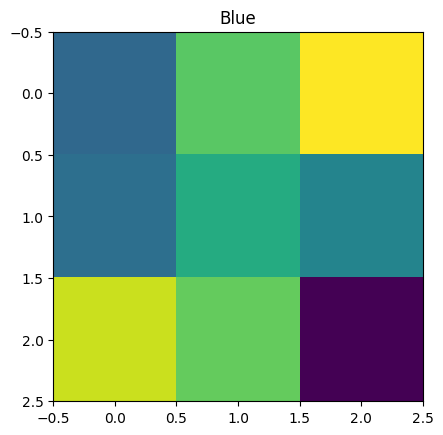

<Figure size 640x480 with 0 Axes>

In [12]:
# Displaying the kernels in RBG order which are associated with weights1
colors = ["Red", "Green", "Blue"]
for i in range(3):
    plt.title(colors[i])
    plt.imshow(weights1[0][:,:, i, 0])
    plt.figure()

In [13]:
n_filters = model.layers[0].filters
kernel_size = model.layers[0].kernel_size
strides = model.layers[0].strides
padding = model.layers[0].padding
input_size = model.layers[0].input_shape

In [14]:
# Here, we are building the instanced on each new layer

original = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding=padding, name="rgb")
original.build(input_size[1:])
original.set_weights(weights_of_first_layer)


RBG_layer = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding=padding, name="rbg")
RBG_layer.build(input_size[1:])
RBG_layer.set_weights(weights1)

GRB_layer = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding=padding, name="grb")
GRB_layer.build(input_size[1:])
GRB_layer.set_weights(weights2)


GBR_layer = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding=padding, name="gbr")
GBR_layer.build(input_size[1:])
GBR_layer.set_weights(weights3)


BGR_layer = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding=padding, name="bgr")
BGR_layer.build(input_size[1:])
BGR_layer.set_weights(weights4)

BRG_layer = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding=padding, name="brg")
BRG_layer.build(input_size[1:])
BRG_layer.set_weights(weights5)

In [15]:
# Here, we are defining the sequence of how the data should be traversed

input_layer = Input((300, 300, 3))
original = original(input_layer)
RBG_layer = RBG_layer(input_layer)
GRB_layer = GRB_layer(input_layer)
GBR_layer = GBR_layer(input_layer)
BGR_layer = BGR_layer(input_layer)
BRG_layer = BRG_layer(input_layer)
output = Add()([original, RBG_layer, GRB_layer, GBR_layer, BGR_layer, BRG_layer])

In [16]:
# By now, we have made the new block which is color invariant. Now, we have connect that with the rest of the model

for layer in model.layers[1:]:
    output = layer(output)

In [17]:
# Creating a new model with the respective input and output layers
new_model = Model(inputs=input_layer, outputs=output)
new_model.compile(optimizer="adam", metrics=["accuracy"], loss=["categorical_crossentropy"])
new_model.save(save_path)